# Celine's MCVE

Basic imports you will need

In [25]:
import numpy as np
from scipy import stats, signal
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Synthetic Data

Not required to do the job, just for fun because it is funny!

Fix the seed to make batch processing reproductible

In [2]:
np.random.seed(12345)

Number of samples

In [3]:
N = 48*366

Let's create some time serie, see:
https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima_process.arma_generate_sample.html

In [4]:
import statsmodels.api as sm
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams]
ma = np.r_[1, maparams]
x = sm.tsa.arma_generate_sample(ar, ma, N)

Create a dataframe to make it sexy

In [5]:
t = pd.date_range('1991-06-03', periods=N, freq='30T')
df = pd.DataFrame(x, index=t, columns=['data'])
df.tail()

,data
1992-06-02 21:30:00,-1.580538
1992-06-02 22:00:00,0.494574
1992-06-02 22:30:00,1.854863
1992-06-02 23:00:00,1.156793
1992-06-02 23:30:00,0.349123


It looks like:

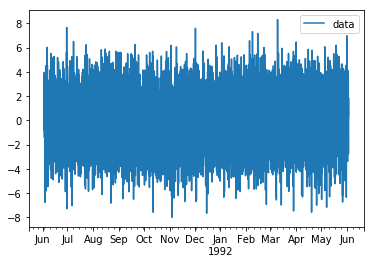

In [6]:
df.plot()

Now we will only use `scipy.stats` to make our computations

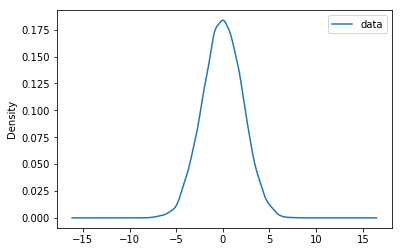

In [7]:
df.plot(kind='kde')

## Who call it Science?

Let's perform some work on those data, do you know about https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_histogram.html

In [28]:
hist = np.histogram(x, bins=100)
hist

(array([  1,   0,   3,   1,   1,   5,   4,   6,   6,   8,   7,   9,   6,
         19,  14,  27,  16,  18,  40,  31,  47,  60,  89,  75, 128, 107,
        125, 135, 171, 181, 204, 215, 223, 261, 289, 328, 337, 363, 367,
        411, 390, 460, 494, 513, 520, 510, 519, 513, 541, 531, 528, 502,
        516, 504, 500, 484, 437, 416, 420, 427, 364, 369, 283, 320, 259,
        231, 239, 187, 175, 149, 134, 116, 104, 103,  98,  56,  55,  50,
         37,  31,  35,  25,  28,  13,   9,   7,   8,   5,   3,   2,   1,
          2,   1,   2,   0,   1,   1,   0,   1,   1], dtype=int64),
 array([-8.00721384, -7.84411155, -7.68100926, -7.51790697, -7.35480468,
        -7.19170239, -7.0286001 , -6.86549781, -6.70239552, -6.53929323,
        -6.37619094, -6.21308865, -6.04998636, -5.88688407, -5.72378178,
        -5.56067949, -5.3975772 , -5.23447491, -5.07137262, -4.90827033,
        -4.74516804, -4.58206575, -4.41896346, -4.25586117, -4.09275888,
        -3.92965659, -3.7665543 , -3.60345201, -3.440349

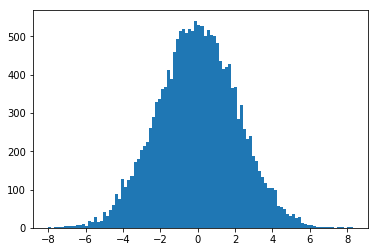

In [33]:
hist = plt.hist(x, bins=100)

In [36]:
kde = stats.gaussian_kde(x)

In [29]:
signal.find_peaks(hist[0])

(array([ 2,  5,  9, 11, 13, 15, 18, 22, 24, 39, 44, 46, 48, 52, 59, 61, 63,
        66, 80, 82, 86, 91, 93, 95], dtype=int64), {})

In [13]:
g = df.groupby(df.index.month)
m = g.groups.keys()
m

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])